# Python interface

## Step 1: creating the **spinfoam** shared library

Let's start importing the *spinfoam.py* module 

In [17]:
import spinfoam as sf

We clean all the previous executable and object files, along with the corresponding folders

In [6]:
sf.spinfoam_clean()

rm -rf obj
rm -rf lib
rm -rf bin


If all dependencies are satisifed, the following cell should compile and build all the required files.

Notice that you can also compile in debug mode with **spinfoam_compile_debug()**

In [18]:
sf.spinfoam_compile()

make: Nessuna operazione da eseguire per «default».


## Step 2: Hashing tables of 21j Wigner symbols 

Now we compute the hash tables with 21j Wigner symbols.

We use the [parallel hashmap](https://github.com/greg7mdp/parallel-hashmap) in order to store the symbols, which will be retrieved during the next step

In [11]:
# this is the folder with the pre-computed hash tables of 3j, 6j anf 9j Wigner symbols. 
# the latter were computed with _fastwigxj_ and _wigxjpf_
fastwig_tables_path = "./ext/fastwig_tables"

# this is the folder in which we decide to store the computed hash tables of 21j symbols
hash_tables_path = "./ext/hashed_21j"

# value of all boundary spins of the spinfoam
spin = 2

In [12]:
sf.Hashing_21j_symbols(hash_tables_path, fastwig_tables_path, spin)

Hashing all 21j symbols with j <= 2...
done


## Step 3: Metropolis-Hastings run

We can finally build the Markov chains by running the MH algorithm.

We run in parallel a Markov chain for each provided thread

In [14]:
# this is the folder in which we decide to store the draws
draws_path = "./data_folder/collected_draws"

# this is the folder with the pre-computed hash tables of 21j Wigner symbols (see Step 2). 
hash_tables_path = "./ext/hashed_21j"

# MH parameters
spin = 2
length = 1000
sigma = 0.4
burnin = 10 
verbosity = 0 

# set optimal number of threads
import multiprocessing
number_of_threads = int(multiprocessing.cpu_count())

In [15]:
number_of_threads

12

In [16]:
sf.Metropolis_Hastings_parallel_run(draws_path, hash_tables_path, spin, length, sigma, burnin, verbosity, number_of_threads)

Starting MH run with 12 threads...
done


# Plots

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
import pandas as pd
import numpy as np


sns.set()
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.0})

#---- This allows the use of LaTeX + the use sans-serif fonts also for tick labels:

rc('text', usetex=True)
#rc('text.latex', preamble=r'\usepackage{cmbright}')

# There are 5 presents for background: darkgrid, whitegrid, dark, white, and ticks
# Define how ticks are placed and define font families

sns.set_style("ticks")
sns.set_style("whitegrid", 
 {'axes.edgecolor': 'black',
 'axes.grid': True,
 'axes.axisbelow': True,
 'axes.labelcolor': '.15',
 'grid.color': '0.9',
 'grid.linestyle': '-',
 'xtick.direction': 'in', 
 'ytick.direction': 'in',
 'xtick.bottom': True,
 'xtick.top': True,
 'ytick.left': True,
 'ytick.right': True, 
 'font.family': ['sans-serif'],
 'font.sans-serif': [
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],})

In [7]:
size_hash_tables_in_MB = [12.8e-03, 409.5e-03, 6.55, 52.42, 209.71, 838.86, 3.35e+03, 6.71e+03]

corresponding_spin = [0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4]

m, c = np.polyfit(np.log(corresponding_spin), np.log(size_hash_tables_in_MB), 1, w=np.sqrt(size_hash_tables_in_MB)) # fit log(y) = m*log(x) + c
y_fit = np.exp(m*np.log(corresponding_spin) + c) # calculate the fitted values of y 

df = pd.DataFrame({
   "size" : size_hash_tables_in_MB,
   "spin" : corresponding_spin,
    "fit" : y_fit
    })

In [8]:
df

,size,spin,fit
0,0.0128,0.5,0.004545
1,0.4095,1.0,0.526787
2,6.5500,1.5,8.492613
3,52.4200,2.0,61.053381
4,209.7100,2.5,281.963782
5,838.8600,3.0,984.273892
6,3350.0000,3.5,2832.373455
7,6710.0000,4.0,7075.943061


In [9]:
corresponding_spin

[0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4]

In [10]:
logx = np.log(corresponding_spin)
print(logx)

[-0.69314718  0.          0.40546511  0.69314718  0.91629073  1.09861229
  1.25276297  1.38629436]


In [11]:
size_hash_tables_in_MB

[0.0128, 0.4095, 6.55, 52.42, 209.71, 838.86, 3350.0, 6710.0]

In [12]:
from matplotlib.ticker import ScalarFormatter

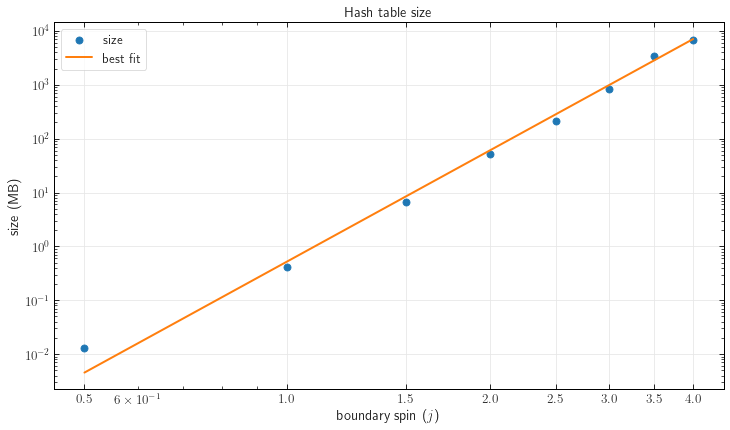

In [13]:
ax = df.plot(x='spin', y='size', s=50, xticks = corresponding_spin, 
             kind='scatter', grid='false', color='tab:blue', label='size',
             logy=True, logx=True, figsize=(12,6.75))
df.plot(x='spin', y='fit', ax=ax, kind='line', color='tab:orange', label='best fit')
plt.ylabel("size (MB)")
plt.xlabel("boundary spin ($j$)")
plt.title('Hash table size')
ax.xaxis.set_major_formatter(ScalarFormatter())


plt.show()

In [56]:
import numpy as np
import matplotlib.pyplot as plt

x_data = np.arange(0.1,10,0.2)    # generate some simple data starting in the range 0.1-10 with steps of 0.2
print(x_data)                     # Let's check the data
y_data = x_data**2  

[0.1 0.3 0.5 0.7 0.9 1.1 1.3 1.5 1.7 1.9 2.1 2.3 2.5 2.7 2.9 3.1 3.3 3.5
 3.7 3.9 4.1 4.3 4.5 4.7 4.9 5.1 5.3 5.5 5.7 5.9 6.1 6.3 6.5 6.7 6.9 7.1
 7.3 7.5 7.7 7.9 8.1 8.3 8.5 8.7 8.9 9.1 9.3 9.5 9.7 9.9]


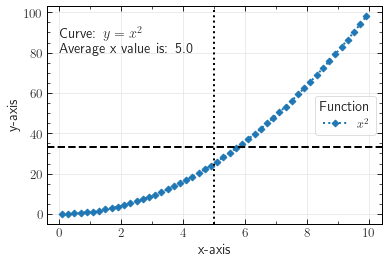

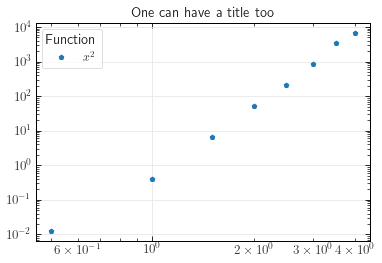

In [68]:
#=============================================================================
#
# Let's make the plot pretty with settings from above.
#
#  - Produces a publication quality plot for an article or thesis.
#=============================================================================

#---- Choose Seaborn colour palette. 
#     This is the only Seaborn piece in this cell, all the rest would work without it.
#     The previous cell does all the decorations and that's what Seaborn did for us.
#
#     More palettes: See: https://seaborn.pydata.org/tutorial/color_palettes.html

sns.set_palette("tab10")

#---- This allows modification of tick positions (& a few other things)

from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
fig, ax = plt.subplots(1,1)

# Set x and y-minor ticks:

ax.yaxis.set_minor_locator(MultipleLocator(5.0))
ax.xaxis.set_minor_locator(MultipleLocator(1.0))

#---- Plot data. One can use LaTeX for legends (label gets picked up by 
#     the legend part below).
#     Linestyles and markers are more or less the same as in Matlab. See:
#     https://matplotlib.org/2.0.2/api/markers_api.html#module-matplotlib.markers
#     https://matplotlib.org/2.0.2/api/lines_api.html#matplotlib.lines.Line2D.set_linestyle

plt.plot(x_data,y_data, label='$x^2$', linestyle=':', marker='D')

#---- Axis labels and legend:

plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.legend(title="Function",loc='center right',fontsize='small',fancybox=True)

#---- It's very easy to plot vertical and horizontal lines for example 
#     for the average values or put them in any arbitrary position.
#     Linestyles are the same as in Matlab

plt.axvline(x=np.mean(x_data), color='black', linestyle=':')
plt.axhline(y=np.mean(y_data), color='black', linestyle='--')

#---- You can add text using the coordinate positions (x,y)
#     The example also shows how to concatenate text from extracted data

plt.text(0, 80, 'Curve: $y=x^2$\nAverage x value is: '+str(np.around(np.mean(x_data),decimals=2)), rotation=0)

#---- Uncomment to save. First give a name. Then a high resolution png and svg files are generated

#printfile = 'testplot'
#plt.savefig(printfile+'.svg')
#plt.savefig(printfile+'.png',dpi=300)

#---- Show 

plt.show()

#---- One can plot more so let's generate a log-log plot:

plt.title('One can have a title too')
plt.loglog(corresponding_spin, size_hash_tables_in_MB, label='$x^2$', marker='p',linestyle=' ')
plt.legend(title="Function",loc='upper left',fontsize='small',fancybox=True)

plt.show()

In [47]:
m, c = np.polyfit(np.log(corresponding_spin), np.log(size_hash_tables_in_MB), 1, w=np.sqrt(size_hash_tables_in_MB)) # fit log(y) = m*log(x) + c
y_fit = np.exp(m*np.log(corresponding_spin) + c) # calculate the fitted values of y 

In [48]:
y_fit

array([4.54527854e-03, 5.26787076e-01, 8.49261343e+00, 6.10533812e+01,
       2.81963782e+02, 9.84273892e+02, 2.83237346e+03, 7.07594306e+03])

In [12]:
import numpy as np
logx = np.log(corresponding_spin)
logy = np.log(size_hash_tables_in_MB)
coeffs = np.polyfit(logx,logy,1)



poly = np.poly1d(coeffs)

In [20]:
coeffs

array([ 6.49349218, -0.40748445])

In [13]:
yfit = lambda corresponding_spin: np.exp(poly(np.log(corresponding_spin)))

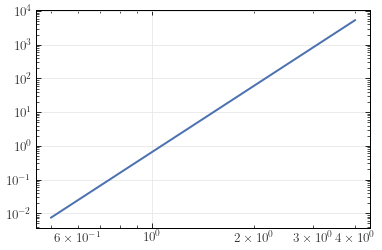

In [14]:
plt.loglog(corresponding_spin, yfit(corresponding_spin))

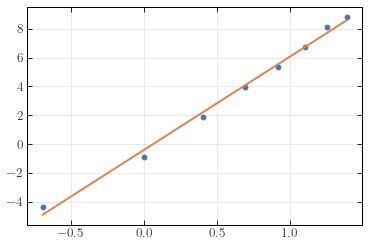

In [22]:
m, b = np. polyfit(np.log(corresponding_spin), np.log(size_hash_tables_in_MB), 1) #m = slope, b = intercept.
plt.plot(logx, logy, 'o') #create scatter plot.
plt.plot(logx, m*logx + b) #add line of best fit.

In [ ]:
sf.Hashing_21j_symbols(hash_tables_path, 2)

In [ ]:
import threading
from time import sleep

In [ ]:
def task(id):
    print(f'Starting the task {id}...')
    sleep(1)
    print('done')

In [37]:
threads = []

for n in range(1, 11):
    t = threading.Thread(target=task, args=(n,))
    threads.append(t)
    t.start()

for t in threads:
    t.join()    

Starting the task 1...
Starting the task 2...
Starting the task 3...
Starting the task 4...
Starting the task 5...
Starting the task 6...
Starting the task 7...
Starting the task 8...
Starting the task 9...
Starting the task 10...
done
done
done
done
done
done
done
done
done
done


In [ ]:
from ctypes import *

so_file = "/home/frisus95/Scrivania/Final_project/lib/libshared.so"
my_functions = CDLL(so_file)

In [9]:
my_functions._Z6MH_runPcS_iidii(
    b"/home/frisus95/Scrivania/Final_project/data_folder",
    b"/home/frisus95/Scrivania/Final_project/data_folder/hashed_21j", 1,
    100000, c_double(0.4), 10, 0)


done. Time elapsed: 0.215507 seconds.
33%% of draws have been accepted
chain with dspin 1 destroyed


In [28]:
my_functions._Z5funzav(c_double(3.14))


done. Time elapsed: 0.002927 seconds.
39%% of draws have been accepted


0

chain with dspin 2 destroyed


In [22]:
# Import packages
import os

import matplotlib.pyplot as plt
import pandas as pd

In [15]:
df = pd.read_csv(
    "/home/frisus95/Scrivania/Final_project/data_folder/collected_draws/j_1/N_1000000__sigma_0.4__burnin_100.csv"
)


In [16]:
df

,intertwiner 1,intertwiner 2,intertwiner 3,intertwiner 4,intertwiner 5,intertwiner 6,intertwiner 7,intertwiner 8,intertwiner 9,intertwiner 10,intertwiner 11,intertwiner 12,intertwiner 13,intertwiner 14,intertwiner 15,intertwiner 16,draw molteplicity,draw amplitude
0,2,0,2,2,1,0,1,0,2,2,0,1,0,2,0,1,4,-2.063960e-07
1,2,0,2,2,1,0,1,0,2,1,0,1,0,2,0,2,3,1.831690e-07
2,1,0,2,2,0,0,1,0,2,0,0,1,1,2,0,2,1,-2.307580e-07
3,1,0,2,2,1,0,1,1,2,0,0,2,1,2,0,2,5,1.127080e-06
4,1,0,2,2,0,0,1,1,2,0,0,2,1,2,0,2,2,1.047860e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201124,2,1,2,1,1,0,1,2,0,0,2,0,0,0,2,2,3,-1.070200e-07
201125,2,1,1,1,1,0,1,2,0,1,2,0,0,0,2,2,1,4.141810e-08
201126,2,2,1,2,0,1,1,2,0,1,2,1,1,0,2,2,8,1.672260e-07
201127,2,2,1,2,0,1,0,2,0,1,2,1,1,1,1,2,2,-2.038570e-07


In [ ]:
for i, j in df.iterrows():
    print(i, j)
    print()

In [17]:
total_rows = len(df)

In [18]:
columns = list(df)

In [19]:
columns

['intertwiner 1',
 'intertwiner 2',
 'intertwiner 3',
 'intertwiner 4',
 'intertwiner 5',
 'intertwiner 6',
 'intertwiner 7',
 'intertwiner 8',
 'intertwiner 9',
 'intertwiner 10',
 'intertwiner 11',
 'intertwiner 12',
 'intertwiner 13',
 'intertwiner 14',
 'intertwiner 15',
 'intertwiner 16',
 'draw molteplicity ',
 'draw amplitude']

In [20]:
for i in columns:

    # printing the third element of the column
    print(df[i][1])


2
0
2
2
1
0
1
0
2
1
0
1
0
2
0
2
3
1.83169e-07


In [21]:
df['intertwiner 1'][100]

0

In [24]:
angle = 0.0

for i in range(total_rows):
    angle += (((df['intertwiner 1'][i]) *
               (df['intertwiner 1'][i] + 1) - 2 * 1 * (1 + 1)) /
              (2 * 1 * (1 + 1))) * df['draw molteplicity '][i]


In [25]:
angle / (1000000 - 100)


-0.3313526352635264